## Applying Random Forest Regressor for Ball Milling

In [60]:
# install packages and libraries as well as initializing font to times new roman
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score


mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False

In [61]:
# read csv file into a df 
ball_mill_particle_data = pd.read_csv('/Users/sarah/Documents/Roux co-op/material recycling project/PyImageJ-Particle-Analysis/Ball Milling Powder Samples/BallMilling ML Data.csv')

# cleaning data so particles fall between 40-110 microns, can comment this out if we do not want to sieve the data 
ball_mill_particle_data_cleaned = ball_mill_particle_data.loc[(ball_mill_particle_data['Feret'] >= 40) & (ball_mill_particle_data['Feret'] <= 100)]
ball_mill_particle_data_cleaned.columns

Index(['Tag', 'Ball-Powder Ratio', 'Jar', '20mm Run Time (Hours)',
       '10mm Run Time (Hours)', '6mm Run Time (Hours)',
       'Total Run Time (Hours)', 'Circ.', 'Feret', 'AR', 'Round', 'Area',
       'Mean', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Major', 'Minor',
       'Angle', 'IntDen', 'RawIntDen', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'Solidity', 'Skew', 'Slice', 'Kurt', 'Median', '%Area',
       'StdDev', 'Min', 'Max', 'X', 'Y'],
      dtype='object')

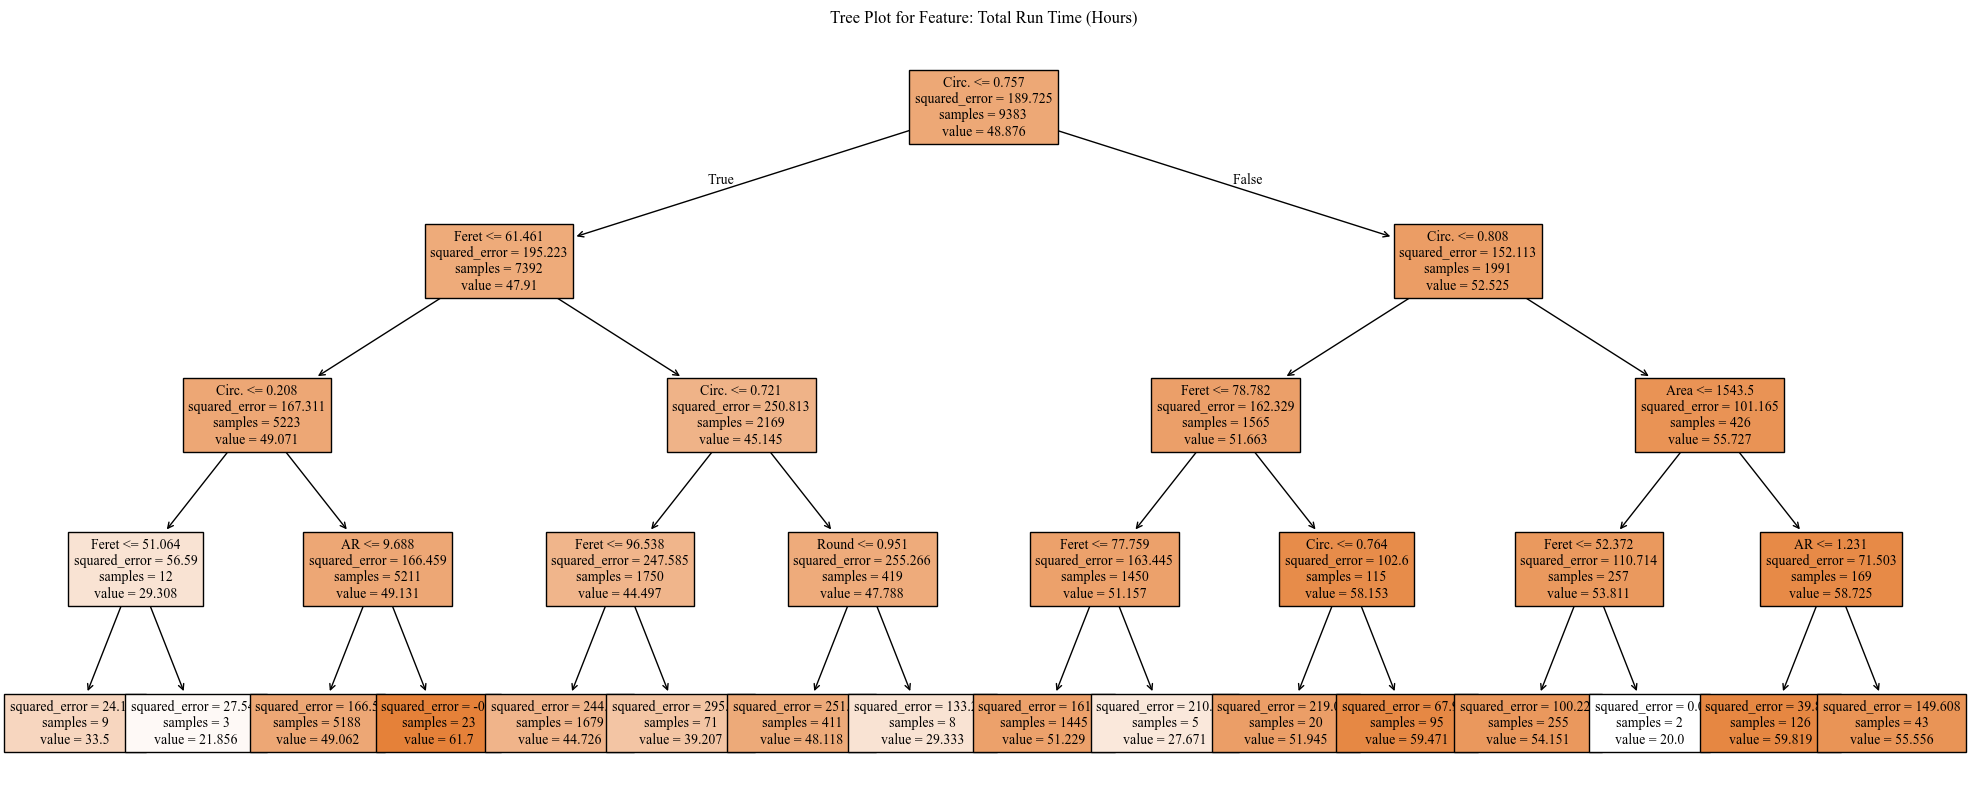

In [62]:
# initialize random forest regressor with max_depth 4 
rf = RandomForestRegressor(random_state=4400,max_depth=4)

# identify our features and target data 
features = ['Circ.', 'Feret', 'AR', 'Round', 'Area']
X = ball_mill_particle_data_cleaned[features] 
y = ball_mill_particle_data_cleaned['Total Run Time (Hours)']  

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# fit model and predict 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# plot tree model 
fig, ax = plt.subplots(figsize=(25, 10))
plot_tree(
    rf.estimators_[0], 
    ax=ax, 
    filled=True, 
    feature_names=features,
    fontsize=10,     
)
plt.title(f"Tree Plot for Feature: Total Run Time (Hours)")
plt.show()

In [ ]:
# calculate mean squared error for the random forest regressor 
mse = mean_squared_error(y_test, y_pred)
mse

179.90488332775527

(20.0, 70.0)

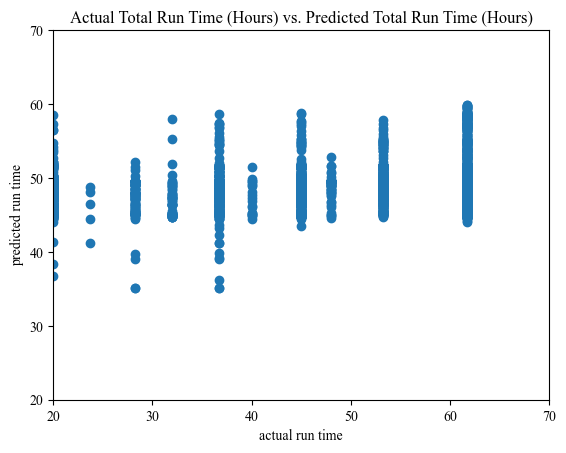

In [65]:
# plot model's predictions vs actual values 
plt.scatter(y_test, y_pred)
plt.title('Actual Total Run Time (Hours) vs. Predicted Total Run Time (Hours)')
plt.xlabel('actual run time') 
plt.ylabel('predicted run time')
plt.ylim(20,70)
plt.xlim(20,70)